## Example Geo Plotting Notebook
Using these libraries:
* [Xarray](https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html): for opening NetCDF (.nc) files
* [Matplotlib](https://matplotlib.org/stable/users/index.html): for plotting in Python
* [Cartopy](https://scitools.org.uk/cartopy/docs/v0.15/index.html): for plotting Geographic data in Python

(1) Install and import libraries

In [ ]:
# pip is a package installer for Google Colab
!pip install cartopy
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt

(2) Open your NetCDF data in Xarray as a Dataset table. Note that it says xarray.Dataset at the top when you print it out.

In [4]:
path = '/content/era5_aug2022.nc' # you will edit this line with the path to your particular file
table = xr.open_dataset(path)

In [5]:
# open the file to see what it looks like
table

<xarray.Dataset> Size: 37MB
Dimensions:         (pressure_level: 3, latitude: 721, longitude: 1440)
Coordinates:
    number          int64 8B ...
    date            int64 8B ...
  * pressure_level  (pressure_level) float64 24B 150.0 100.0 70.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    expver          <U4 16B ...
Data variables:
    z               (pressure_level, latitude, longitude) float32 12MB ...
    t               (pressure_level, latitude, longitude) float32 12MB ...
    u               (pressure_level, latitude, longitude) float32 12MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-09-24T22:44 GRIB to CDM+CF via cfgrib-0.9.1...

(3) Create a DataArray column from your table of data

**Since your data is broken up, your code might look like:**
zonal_wind = zonal_wind_array.u


In [11]:
zonal_wind = table.u

# print it out to check that it says xarray.DataArray at top followed by the variable you want
zonal_wind

<xarray.DataArray 'u' (pressure_level: 3, latitude: 721, longitude: 1440)> Size: 12MB
[3114720 values with dtype=float32]
Coordinates:
    number          int64 8B ...
    date            int64 8B ...
  * pressure_level  (pressure_level) float64 24B 150.0 100.0 70.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    expver          <U4 16B ...
Attributes: (12/31)
    GRIB_paramId:                             131
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_shortName:                           u
    GRIB_totalNumber:                         0
    GRIB_units:                               m s**-1
    long_name:                                U component of wind
    units:                                    m s**-1
    standard_name:                            eastward_wind

(4) Plot using the Xarray plot function along with Matplotlib and Cartopy libraries

Block 1:
* plt.subplots calls the matplotlib subplots function
* (3, 1, ...) is 3 rows by 1 column2
* figsize is figure size
* subplot_kw is subplot key words and it allows you to edit the plot settings. This is where you put the projection you want to view.

Block 2:
* Isolate the different pressure levels using ".sel()"

Block 3:
* Plot zonal wind at each pressure level using built in Xarray function.
* Specify the axis (Python starts indexing at 0)
* Transform specifies the original projection of the data

Block 4:
* add coastlines (land shapes) to each axis using $ax[i]$.coastlines()
* Set super/overall title for figure using fig.suptitle()
* Set titles for subplots using $ax[i]$.set_title()

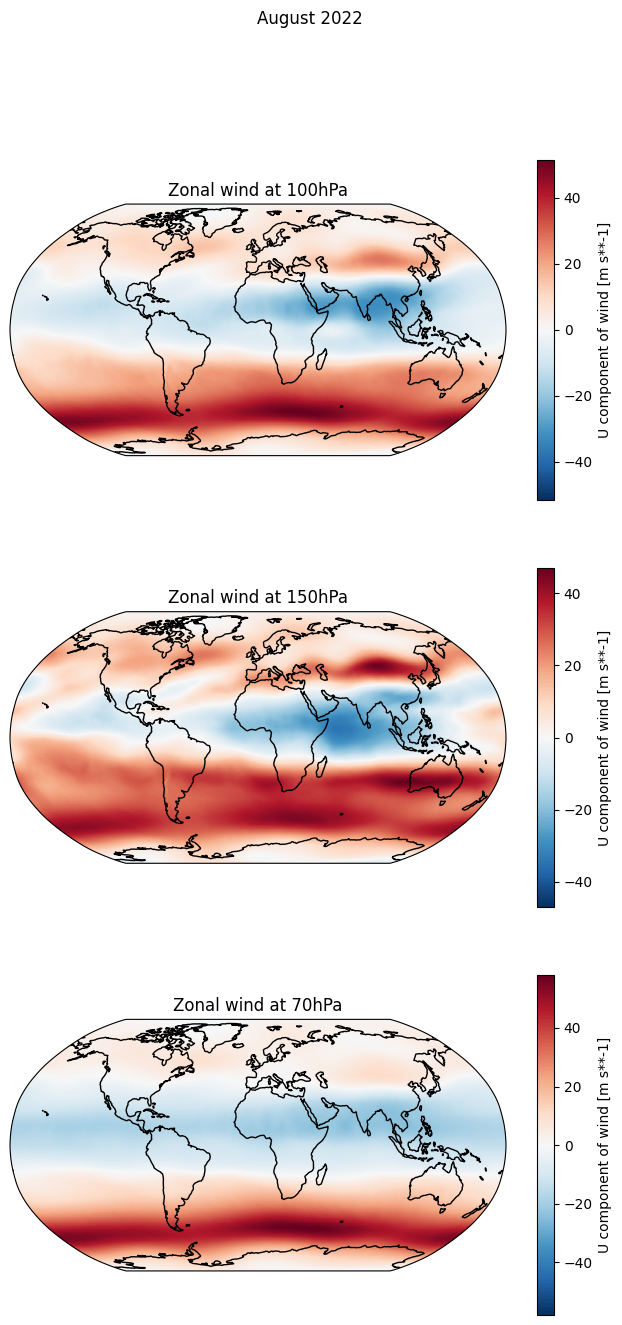

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(8, 15), subplot_kw=dict(projection=ccrs.Robinson()))

zonal_wind1 = zonal_wind.sel(pressure_level=100)
zonal_wind2 = zonal_wind.sel(pressure_level=150)
zonal_wind3 = zonal_wind.sel(pressure_level=70)

zonal_wind1.plot(ax=ax[0], transform=ccrs.PlateCarree())
zonal_wind2.plot(ax=ax[1], transform=ccrs.PlateCarree())
zonal_wind3.plot(ax=ax[2], transform=ccrs.PlateCarree())

ax[0].coastlines()
ax[1].coastlines()
ax[2].coastlines()
fig.suptitle('August 2022');
ax[0].set_title('Zonal wind at 100hPa');
ax[1].set_title('Zonal wind at 150hPa');
ax[2].set_title('Zonal wind at 70hPa');